In [1]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout 
from sklearn.model_selection import train_test_split

In [12]:
data="data/cleaned_all_data/"

In [13]:
pwd

'D:\\projects\\Personal\\Fraudulent-Signature-Detection'

In [15]:
df=pd.read_csv(r"data/annotated_data.csv")
df.info

<bound method DataFrame.info of                    data  annotation
0       E-S-01-F-01.png           1
1       E-S-01-F-02.png           1
2       E-S-01-F-03.png           1
3       E-S-01-F-04.png           1
4       E-S-01-F-05.png           1
...                 ...         ...
18300  B-S-100-G-20.tif           0
18301  B-S-100-G-21.tif           0
18302  B-S-100-G-22.tif           0
18303  B-S-100-G-23.tif           0
18304  B-S-100-G-24.tif           0

[18305 rows x 2 columns]>

In [16]:
df.head()

,data,annotation
0,E-S-01-F-01.png,1
1,E-S-01-F-02.png,1
2,E-S-01-F-03.png,1
3,E-S-01-F-04.png,1
4,E-S-01-F-05.png,1


In [17]:
images=df["data"].values

In [18]:
len(images)

18305

In [19]:
labels=df["annotation"].values

In [20]:
len(labels)

18305

In [21]:
import cv2
import numpy as np

In [25]:
X=[]
for image in images[:]:
    img=cv2.imread(data+image,cv2.IMREAD_UNCHANGED)
    img=cv2.bitwise_not(img)
    X.append(img)
X=np.array(X)

In [27]:
Y=[]
for label in labels:
    label_=[label]
    Y.append(label_)

In [28]:
X.shape

(18305, 256, 512)

In [29]:
Y=np.array(Y)
Y.shape

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [32]:
y_train.shape

(14644, 1)

In [33]:
model=Sequential()

In [34]:
model.add(Input((256,512,1)))
model.add(Conv2D(32,activation = 'relu',kernel_size = (3,5)))
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,5)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,activation = 'relu',kernel_size = (3,5)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(256,activation = 'relu',kernel_size = (3,5)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(512,activation = 'relu',kernel_size = (3,5)))
model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(1024,activation = 'relu',kernel_size = (3,4)))
# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.35))
model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = "softmax"))

In [35]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [36]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [37]:
filename = 'model/saved_models/fraud_sign_det_test6_rect_kernel_try1.h5'

In [38]:
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 508, 32)      512       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 254, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 250, 64)      30784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 125, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 121, 128)      123008    
                                                                 
 batch_normalization (BatchN  (None, 60, 121, 128)     5

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 20, batch_size = 16,verbose=1, callbacks=[checkpoint])

Epoch 1/20
916/916 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.6465
Epoch 00001: val_loss improved from inf to 0.61919, saving model to model/saved_models\fraud_sign_det_test6_rect_kernel_try1.h5
916/916 [==============================] - 133s 137ms/step - loss: 0.7790 - accuracy: 0.6465 - val_loss: 0.6192 - val_accuracy: 0.6785
Epoch 2/20
916/916 [==============================] - ETA: 0s - loss: 0.5853 - accuracy: 0.7108
Epoch 00002: val_loss did not improve from 0.61919
916/916 [==============================] - 176s 193ms/step - loss: 0.5853 - accuracy: 0.7108 - val_loss: 0.6707 - val_accuracy: 0.6173
Epoch 3/20
916/916 [==============================] - ETA: 0s - loss: 0.5389 - accuracy: 0.7486
Epoch 00003: val_loss improved from 0.61919 to 0.50728, saving model to model/saved_models\fraud_sign_det_test6_rect_kernel_try1.h5
916/916 [==============================] - 248s 271ms/step - loss: 0.5389 - accuracy: 0.7486 - val_loss: 0.5073 - val_accuracy: 0.7

In [41]:
def plot_accuracy(history):
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_sparse_categorical_accuracy'])
#     plt.plot(history.history['sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['val_accuracy', 'Train_accuracy'], loc = 'best')
    plt.show()

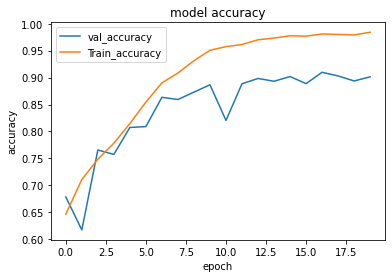

In [42]:
plot_accuracy(history)

In [43]:
def plot_loss(history):
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'train_loss'], loc = 'best')
    plt.show()

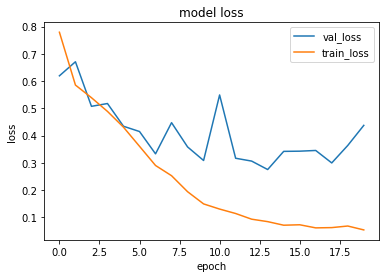

In [44]:
plot_loss(history)